# <font color=black>1. Importing the required libraries for Explatory Data Analysis (EDA)</font>

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns                #vizualisation
import matplotlib.pyplot as plt             #vizualisation
%matplotlib inline     
sns.set(color_codes=True)

# <font color=black>2. Reading the data into the dataframe</font>

In [8]:
import os
os.chdir(r'C:\Users\joewa\OneDrive\Documents\IBM_Data_Science')

df = pd.read_csv('data.csv')
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [9]:
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


# <font color=black>3. Checking the types of data</font>

In [12]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

# <font color=black>4. Dropping irrelevant columns</font>

In [14]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


# <font color=black>5. Renaming the columms</font>

In [16]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


# <font color=black>6. Dropping duplicate rows</font>

In [19]:
df.shape

(11914, 10)

In [21]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 10)


In [23]:
df.count()

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

In [27]:
df =  df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [28]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

# <font color=black>7. Removing the null values</font>

In [29]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [32]:
df = df.dropna()
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

In [33]:
print(df.isnull().sum())

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


# <font color=black>8. Detecting outliers</font>

<font color=black> An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers. The technique of finding and removing outlier that I am performing in this assignment is taken help of a tutorial from [towards data science](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba.) </font>

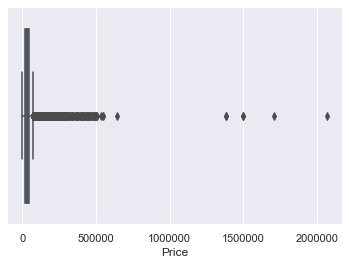

In [35]:
sns.boxplot(x=df['Price'])

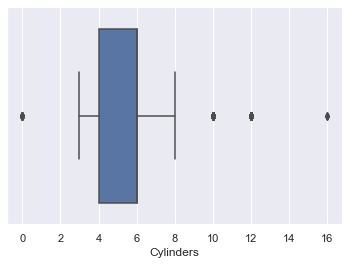

In [36]:
sns.boxplot(x=df['Cylinders'])

In [40]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


In [41]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(9191, 10)

# <font color=black>9. Plot different features against one another (scatter), against frequency (histogram)</font>

## <font color=black> Histogram </font>

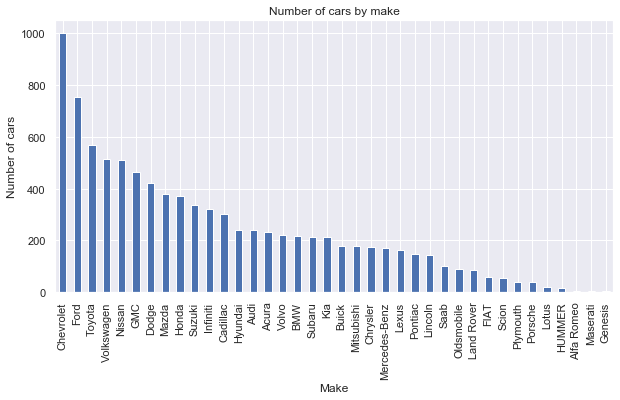

In [46]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

## <font color=black>Heat Maps</font>

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG-H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


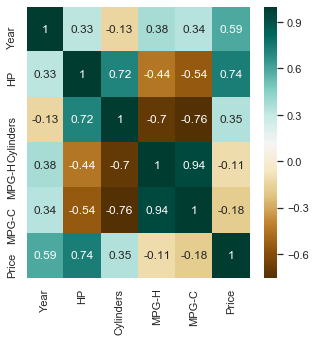

In [78]:
plt.figure(figsize=(5,5))
c= df.corr()
ax = sns.heatmap(c,cmap="BrBG",annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

c

## <font color=black>Scatterplot</font>

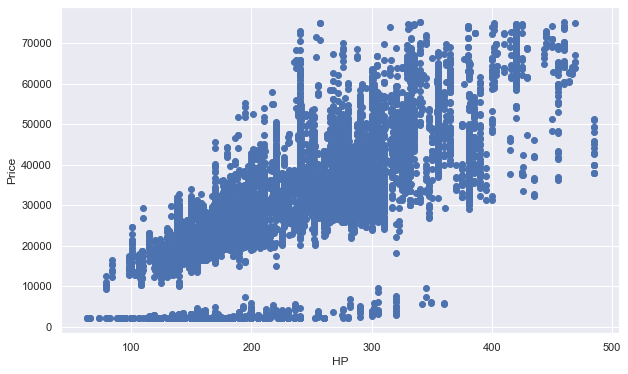

In [79]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()